In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [2]:
df1 = pd.read_csv('utilities_disconnection.csv',sep=';')
df2 = pd.read_csv('utilities_disconnection_planilha2.csv',sep=';')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618346 entries, 0 to 618345
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   client_id                618346 non-null  int64  
 1   regional                 618346 non-null  int64  
 2   site                     618346 non-null  int64  
 3   client_class             618346 non-null  int64  
 4   client_subclass          618346 non-null  int64  
 5   connection_type          618346 non-null  object 
 6   connection_status        618346 non-null  object 
 7   installment_value        618346 non-null  float64
 8   installment_status       247561 non-null  object 
 9   total_debt               618346 non-null  float64
 10  total_bills              618346 non-null  int64  
 11  disconnection_date       618346 non-null  object 
 12  disconnection_requested  618346 non-null  object 
 13  contractor_id            618346 non-null  int64  
 14  disc

In [4]:
df1.drop_duplicates(inplace=True)

In [5]:
df1.isna().sum()

client_id                       0
regional                        0
site                            0
client_class                    0
client_subclass                 0
connection_type                 0
connection_status               0
installment_value               0
installment_status         370736
total_debt                      0
total_bills                     0
disconnection_date              0
disconnection_requested         0
contractor_id                   0
disconnection_executed          0
collected                       0
dtype: int64

In [6]:
# substituir valores nulos por -1

df1['installment_status'].fillna(-1, inplace=True)

In [7]:
pysqldf("""select connection_status, count(connection_status) from df1
where collected = 1
group by connection_status
""")

,connection_status,count(connection_status)
0,connected,264623
1,disconnected,3468


In [8]:
pysqldf("""select connection_status, count(connection_status) from df1
where collected = 0
group by connection_status
""")

,connection_status,count(connection_status)
0,connected,48367
1,disconnected,301746


In [9]:
pysqldf = lambda q: sqldf(q, globals())
pysqldf("""select * from df1
where disconnection_requested <> disconnection_executed
""")

,client_id,regional,site,client_class,client_subclass,connection_type,connection_status,installment_value,installment_status,total_debt,total_bills,disconnection_date,disconnection_requested,contractor_id,disconnection_executed,collected
0,4,2,22212,1,1,biphasic connection,disconnected,2172.29,complete,484.10,4,16/03/2017,pole,156,circuit_break,0
1,6,4,42491,1,1,three-phase connection,connected,1487.33,current,1816.14,2,15/03/2017,remote,272,circuit_break,1
2,20,3,32281,1,1,biphasic connection,connected,0.00,-1,736.01,4,20/03/2017,pole,189,circuit_break,1
3,29,1,12390,1,1,single-phase connection,disconnected,0.00,-1,750.18,2,28/03/2017,circuit_break,20,branch,0
4,31,2,22330,1,1,single-phase connection,disconnected,387.36,complete,567.35,7,17/03/2017,circuit_break,166,pole,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124748,157324,4,42401,1,1,three-phase connection,disconnected,0.00,-1,2257.08,10,28/02/2018,pole,272,circuit_break,0
124749,340348,4,42401,1,1,biphasic connection,disconnected,0.00,-1,357.57,1,28/02/2018,pole,272,circuit_break,0
124750,898374,4,42401,1,1,three-phase connection,disconnected,0.00,-1,752.32,7,28/02/2018,pole,272,circuit_break,0
124751,157337,4,42401,1,1,biphasic connection,disconnected,0.00,-1,312.56,3,28/02/2018,pole,272,circuit_break,0


In [10]:
pysqldf("""select disconnection_requested, count(disconnection_requested) from df1
where collected = 1
group by disconnection_requested
""")

,disconnection_requested,count(disconnection_requested)
0,branch,5097
1,circuit_break,87272
2,pole,23293
3,remote,152429


In [11]:
pysqldf("""select regional, count(regional) from df1
where disconnection_requested <> disconnection_executed
group by regional
""")

,regional,count(regional)
0,1,51289
1,2,7313
2,3,15106
3,4,51045


In [12]:
pysqldf("""select regional, count(regional) from df1
where disconnection_requested = 'remote'
group by regional
""")

,regional,count(regional)
0,1,27177
1,2,228196
2,4,29


c:\Program Files\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31/03/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Program Files\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20/03/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Program Files\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29/03/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Program Files\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/03/2017' in DD/MM/YYYY format. Provide format o

<AxesSubplot: >

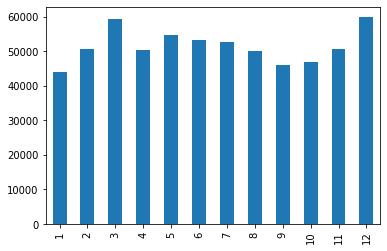

In [13]:
# plot time series of disconnection_date

df1['disconnection_date'] = pd.to_datetime(df1['disconnection_date'])
df1['disconnection_date'].dt.month.value_counts().sort_index().plot(kind='bar')


In [14]:
df1.groupby('client_id')['regional'].count().sort_values(ascending=False)

client_id
181679     16
61993      15
170146     15
39037      15
174430     15
           ..
328574      1
328571      1
328568      1
328567      1
1100749     1
Name: regional, Length: 418463, dtype: int64

In [15]:
df1.head(10)

,client_id,regional,site,client_class,client_subclass,connection_type,connection_status,installment_value,installment_status,total_debt,total_bills,disconnection_date,disconnection_requested,contractor_id,disconnection_executed,collected
0,0,1,13414,1,7,single-phase connection,disconnected,252.39,complete,662.62,4,2017-06-03,circuit_break,66,circuit_break,0
1,1,1,14071,1,1,single-phase connection,disconnected,0.00,-1,1202.45,17,2017-03-31,circuit_break,73,circuit_break,0
2,2,1,12380,1,1,biphasic connection,disconnected,0.00,-1,352.56,1,2017-03-20,circuit_break,20,circuit_break,0
3,3,1,14071,1,1,biphasic connection,disconnected,1317.25,complete,699.23,9,2017-03-29,pole,73,pole,0
4,4,2,22212,1,1,biphasic connection,disconnected,2172.29,complete,484.10,4,2017-03-16,pole,156,circuit_break,0
5,5,3,32281,3,1,single-phase connection,disconnected,295.55,current,160.90,1,2017-03-31,circuit_break,189,circuit_break,0
6,6,4,42491,1,1,three-phase connection,connected,1487.33,current,1816.14,2,2017-03-15,remote,272,circuit_break,1
7,7,1,12390,1,1,biphasic connection,disconnected,0.00,-1,3170.49,10,2017-03-15,circuit_break,20,circuit_break,0
8,8,1,13414,1,1,biphasic connection,disconnected,2079.39,complete,1927.97,4,2017-06-03,circuit_break,66,circuit_break,0
9,9,1,14071,1,1,three-phase connection,disconnected,786.25,complete,2069.34,8,2017-03-15,pole,73,pole,0


# Data preparing

In [16]:
df1.drop(['installment_status','installment_value'], axis=1, inplace=True)

In [17]:
df2

,disconnection_requested,regional,cost
0,circuit_break,1,12.05
1,circuit_break,2,11.04
2,circuit_break,3,13.67
3,circuit_break,4,10.76
4,pole,1,23.21
5,pole,2,20.89
6,pole,3,26.74
7,pole,4,19.32
8,branch,1,60.05
9,branch,2,54.76


In [18]:
sum = df2.groupby('regional')['cost'].sum().to_list()

sum

[96.34, 87.72, 99.88, 96.91]

In [19]:
dict_cost_by_regional = {1:[],2:[],3:[],4:[]}

for row in df2.itertuples():
	dict_cost_by_regional[row.regional].append(row.cost)

dict_cost_by_regional

{1: [12.05, 23.21, 60.05, 1.03],
 2: [11.04, 20.89, 54.76, 1.03],
 3: [13.67, 26.74, 58.44, 1.03],
 4: [10.76, 19.32, 65.8, 1.03]}

In [20]:
for key, value in dict_cost_by_regional.items():
	for i in range(len(value)):
		value[i] = value[i]/sum[key-1]

for key in dict_cost_by_regional.keys():
	dict_cost_by_regional[key] = np.array(dict_cost_by_regional[key])

dict_cost_by_regional

{1: array([0.12507785, 0.24091758, 0.62331327, 0.0106913 ]),
 2: array([0.12585499, 0.23814409, 0.62425901, 0.01174191]),
 3: array([0.13686424, 0.26772127, 0.58510212, 0.01031237]),
 4: array([0.11103085, 0.19936023, 0.6789805 , 0.01062842])}

In [21]:
# one hot enconding class in region

dummie_regional_DF = pd.get_dummies(df1['regional'])

req_DF = df1['disconnection_requested']

req_DF = req_DF.replace({'circuit_break':0,'pole':1,'branch':2,'remote':3})

exec_DF = df1['disconnection_executed']

exec_DF = exec_DF.replace({'circuit_break':0,'pole':1,'branch':2,'remote':3})


In [22]:
exec_np = exec_DF.to_numpy()
req_np = req_DF.to_numpy()
dummie_regional_list1 = dummie_regional_DF.to_numpy().tolist()
dummie_regional_list2 = dummie_regional_DF.to_numpy().tolist()

exec_list = []
req_list = []

i = 0
while i < len(exec_DF):
	for j in range(1,5):
		if dummie_regional_list1[i][j-1] == 1:
			#print(dict_cost_by_regional[j][req_np[i]])
			exec_list.append(dict_cost_by_regional[j][exec_np[i]])
			req_list.append(dict_cost_by_regional[j][req_np[i]])
			dummie_regional_list1[i][j-1] = dict_cost_by_regional[j][exec_np[i]]
			dummie_regional_list2[i][j-1] = dict_cost_by_regional[j][req_np[i]]
			break
	i += 1

In [23]:
dummie_regional_list1 = pd.DataFrame(dummie_regional_list1,columns=['req_regional1','req_regional2','req_regional3','req_regional4'])
dummie_regional_list2 = pd.DataFrame(dummie_regional_list2,columns=['exec_regional1','exec_regional2','exec_regional3','exec_regional4'])

In [24]:
dummie_regional_list1

,req_regional1,req_regional2,req_regional3,req_regional4
0,0.125078,0.000000,0.0,0.000000
1,0.125078,0.000000,0.0,0.000000
2,0.125078,0.000000,0.0,0.000000
3,0.240918,0.000000,0.0,0.000000
4,0.000000,0.125855,0.0,0.000000
...,...,...,...,...
618199,0.000000,0.000000,0.0,0.111031
618200,0.000000,0.000000,0.0,0.111031
618201,0.125078,0.000000,0.0,0.000000
618202,0.000000,0.000000,0.0,0.199360


In [25]:
# others columns One Hot Enconding

dummie_conn_DF = pd.get_dummies(df1['connection_type'])
dumbie_client_class_DF = pd.get_dummies(df1['client_class'])
dumbie_client_subclass_DF = pd.get_dummies(df1['client_subclass'])


In [26]:
dumbie_client_class_DF.columns = list(map(lambda x: 'client_class_' + str(x),list(dumbie_client_class_DF.columns)))

dumbie_client_subclass_DF.columns =  list(map(lambda x: 'client_subclass_' + str(x),list(dumbie_client_subclass_DF.columns)))

In [27]:
df1.head()

,client_id,regional,site,client_class,client_subclass,connection_type,connection_status,total_debt,total_bills,disconnection_date,disconnection_requested,contractor_id,disconnection_executed,collected
0,0,1,13414,1,7,single-phase connection,disconnected,662.62,4,2017-06-03,circuit_break,66,circuit_break,0
1,1,1,14071,1,1,single-phase connection,disconnected,1202.45,17,2017-03-31,circuit_break,73,circuit_break,0
2,2,1,12380,1,1,biphasic connection,disconnected,352.56,1,2017-03-20,circuit_break,20,circuit_break,0
3,3,1,14071,1,1,biphasic connection,disconnected,699.23,9,2017-03-29,pole,73,pole,0
4,4,2,22212,1,1,biphasic connection,disconnected,484.10,4,2017-03-16,pole,156,circuit_break,0


In [28]:
df_to_model = pd.concat([df1[['total_debt','total_bills','collected']],dummie_conn_DF,dumbie_client_class_DF,dumbie_client_subclass_DF,dummie_regional_list2], axis=1)

In [29]:
df_to_model.dropna(inplace=True)

In [30]:
df_to_model.head()

,total_debt,total_bills,collected,biphasic connection,single-phase connection,three-phase connection,client_class_1,client_class_2,client_class_3,client_class_4,...,client_subclass_41,client_subclass_51,client_subclass_61,client_subclass_88,client_subclass_89,client_subclass_92,exec_regional1,exec_regional2,exec_regional3,exec_regional4
0,662.62,4.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.125078,0.000000,0.0,0.0
1,1202.45,17.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.125078,0.000000,0.0,0.0
2,352.56,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.125078,0.000000,0.0,0.0
3,699.23,9.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.240918,0.000000,0.0,0.0
4,484.10,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.238144,0.0,0.0


In [31]:
df_to_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 618062 entries, 0 to 618203
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   total_debt               618062 non-null  float64
 1   total_bills              618062 non-null  float64
 2   collected                618062 non-null  float64
 3   biphasic connection      618062 non-null  float64
 4   single-phase connection  618062 non-null  float64
 5   three-phase connection   618062 non-null  float64
 6   client_class_1           618062 non-null  float64
 7   client_class_2           618062 non-null  float64
 8   client_class_3           618062 non-null  float64
 9   client_class_4           618062 non-null  float64
 10  client_class_5           618062 non-null  float64
 11  client_class_7           618062 non-null  float64
 12  client_subclass_1        618062 non-null  float64
 13  client_subclass_2        618062 non-null  float64
 14  clie

In [32]:
df1.groupby('client_id')['collected'].count()[df1.groupby('client_id')['collected'].count()==1]

client_id
2          1
4          1
11         1
12         1
14         1
          ..
1100733    1
1100734    1
1100739    1
1100744    1
1100749    1
Name: collected, Length: 297384, dtype: int64

In [146]:
df1[df1['client_id']==11]

,client_id,regional,site,client_class,client_subclass,connection_type,connection_status,total_debt,total_bills,disconnection_date,disconnection_requested,contractor_id,disconnection_executed,collected
11,11,3,32281,1,1,single-phase connection,disconnected,462.5,3,2017-03-31,circuit_break,189,circuit_break,0


In [34]:
df1['client_id'].unique().shape

(418463,)

In [33]:
df1[df1['collected']==1].count()

client_id                  268091
regional                   268091
site                       268091
client_class               268091
client_subclass            268091
connection_type            268091
connection_status          268091
total_debt                 268091
total_bills                268091
disconnection_date         268091
disconnection_requested    268091
contractor_id              268091
disconnection_executed     268091
collected                  268091
dtype: int64

In [35]:
clients = df1['client_id'].unique()

In [49]:
number_of_collected = 0
prob = []
for client in clients:
	fil = df1[df1['client_id']==client].sort_values('disconnection_date')
	len_fil = len(fil)
	fil_np = fil['collected'].to_numpy()
	if  fil_np[len_fil] == 1:
		prob.append({client:[np.sum(fil_np)/len_fil,fil['disconnection_executed']]})
	else:
		prob.append({client:0})
print(prob[0:20])

KeyboardInterrupt: 

In [50]:
prob

[{0: 0},
 {1: 0},
 {2: 0},
 {3: 0},
 {4: 0},
 {5: 0},
 {6: 0.5},
 {7: 0},
 {8: 0},
 {9: 0},
 {10: 0},
 {11: 0},
 {12: 1.0},
 {14: 0},
 {16: 0},
 {17: 1.0},
 {18: 0},
 {19: 0},
 {20: 1.0},
 {21: 0},
 {22: 0},
 {23: 0},
 {24: 1.0},
 {25: 0},
 {26: 1.0},
 {27: 0},
 {28: 0},
 {29: 0},
 {30: 0.5},
 {31: 0},
 {32: 0},
 {33: 0.25},
 {34: 0},
 {35: 1.0},
 {38: 1.0},
 {39: 0},
 {40: 0},
 {41: 1.0},
 {42: 0},
 {44: 0},
 {45: 0},
 {46: 0},
 {47: 0},
 {48: 0},
 {49: 0},
 {50: 0},
 {51: 0},
 {52: 0.5},
 {53: 0},
 {54: 0},
 {55: 0},
 {56: 0.5},
 {57: 0},
 {58: 0},
 {59: 1.0},
 {60: 0},
 {61: 0},
 {62: 1.0},
 {65: 0},
 {66: 0},
 {67: 0.5},
 {68: 0},
 {69: 1.0},
 {70: 1.0},
 {71: 0},
 {72: 1.0},
 {73: 1.0},
 {74: 1.0},
 {84: 0},
 {85: 1.0},
 {86: 0},
 {87: 0},
 {89: 1.0},
 {90: 0},
 {92: 0},
 {93: 0},
 {137: 0},
 {138: 0},
 {139: 0},
 {140: 1.0},
 {141: 1.0},
 {142: 1.0},
 {143: 1.0},
 {144: 0},
 {145: 0},
 {146: 0},
 {147: 1.0},
 {148: 0.25},
 {186: 1.0},
 {187: 0.5},
 {188: 0},
 {189: 0},
 {190: 1.0

In [ ]:
df_to_model

# Class model training

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
X = df_to_model.drop(['collected',"req_regional1", "req_regional2",	"req_regional3",	"req_regional4"], axis=1)
y = df_to_model['collected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [116]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

c:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.63      0.80      0.70    104766
         1.0       0.60      0.39      0.47     80653

    accuracy                           0.62    185419
   macro avg       0.61      0.59      0.59    185419
weighted avg       0.62      0.62      0.60    185419



<AxesSubplot: >

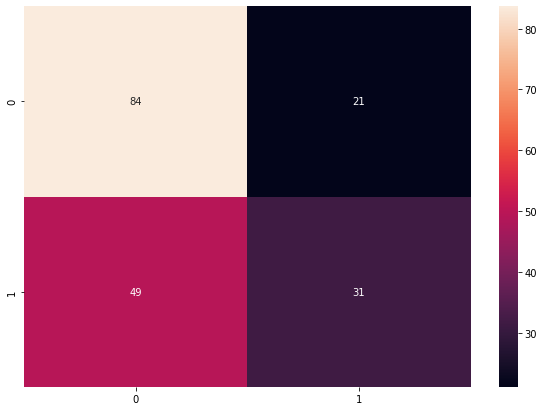

In [118]:
# plot confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,7))
cm = np.around(cm.astype('float')/1000, decimals=2)
sns.heatmap(cm, annot=True)

Logistic: ROC AUC=0.710


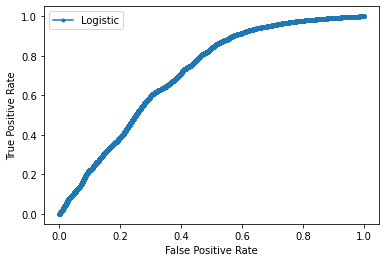

In [35]:
# plot ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
lr_probs = logmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()

In [119]:
# decision tree

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.64      0.67      0.66    104766
         1.0       0.55      0.51      0.53     80653

    accuracy                           0.60    185419
   macro avg       0.59      0.59      0.59    185419
weighted avg       0.60      0.60      0.60    185419



<AxesSubplot: >

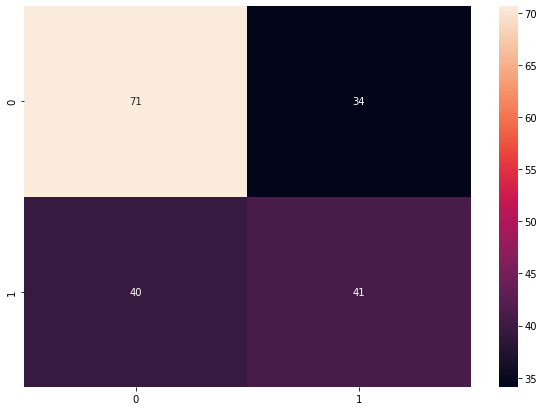

In [120]:
# plot confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,7))
cm = np.around(cm.astype('float')/1000, decimals=2)
sns.heatmap(cm, annot=True)


<AxesSubplot: >

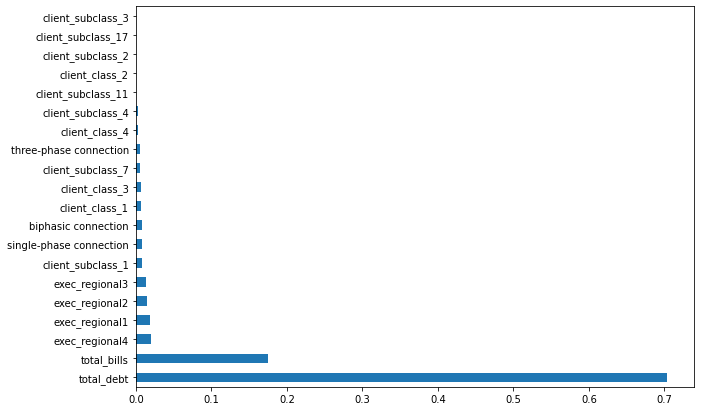

In [121]:
# plot feature importance
plt.figure(figsize=(10,7))
feat_importances = pd.Series(dtree.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')


In [48]:
X.columns


Index(['total_debt', 'total_bills', 'biphasic connection',
       'single-phase connection', 'three-phase connection', 'client_class_1',
       'client_class_2', 'client_class_3', 'client_class_4', 'client_class_5',
       'client_class_7', 'client_subclass_1', 'client_subclass_2',
       'client_subclass_3', 'client_subclass_4', 'client_subclass_6',
       'client_subclass_7', 'client_subclass_8', 'client_subclass_9',
       'client_subclass_11', 'client_subclass_14', 'client_subclass_17',
       'client_subclass_19', 'client_subclass_41', 'client_subclass_51',
       'client_subclass_61', 'client_subclass_88', 'client_subclass_89',
       'client_subclass_92', 'exec_regional1', 'exec_regional2',
       'exec_regional3', 'exec_regional4'],
      dtype='object')

In [56]:
# drop features with low importance
X2 = X.drop(['client_class_1','client_class_2', 'client_class_3', 'client_class_4', 'client_class_5','total_debt'], axis=1)

In [72]:
dtree = DecisionTreeClassifier()
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.30, random_state=101)
dtree.fit(X_train2,y_train2)

predictions = dtree.predict(X_test2)
print(classification_report(y_test2,predictions))

              precision    recall  f1-score   support

         0.0       0.73      0.60      0.66    104766
         1.0       0.58      0.72      0.64     80653

    accuracy                           0.65    185419
   macro avg       0.66      0.66      0.65    185419
weighted avg       0.67      0.65      0.65    185419



In [73]:
# random forest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))

KeyboardInterrupt: 

In [39]:
# boosting
import xgboost as xgb
import lightgbm as lgb

In [40]:
X_train 

,total_debt,total_bills,biphasic connection,single-phase connection,three-phase connection,client_class_1,client_class_2,client_class_3,client_class_4,client_class_5,...,client_subclass_41,client_subclass_51,client_subclass_61,client_subclass_88,client_subclass_89,client_subclass_92,exec_regional1,exec_regional2,exec_regional3,exec_regional4
458874,599.25,9.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.623313,0.000000,0.0,0.000000
234796,107.16,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.011742,0.0,0.000000
401079,359.15,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.238144,0.0,0.000000
514378,67.79,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.111031
460786,158.46,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.010691,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311975,54.81,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.011742,0.0,0.000000
204679,67.72,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.011742,0.0,0.000000
476616,94.44,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.111031
214609,327.24,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.011742,0.0,0.000000


In [122]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.65      0.70    104766
         1.0       0.61      0.71      0.66     80653

    accuracy                           0.68    185419
   macro avg       0.68      0.68      0.68    185419
weighted avg       0.69      0.68      0.68    185419



In [123]:
# lightgbm

lgb_model = lgb.LGBMClassifier()

lgb_model.fit(X_train, y_train)

lgb_pred = lgb_model.predict(X_test)
print(classification_report(y_test,lgb_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.65      0.70    104766
         1.0       0.61      0.71      0.66     80653

    accuracy                           0.68    185419
   macro avg       0.68      0.68      0.68    185419
weighted avg       0.69      0.68      0.68    185419



<AxesSubplot: >

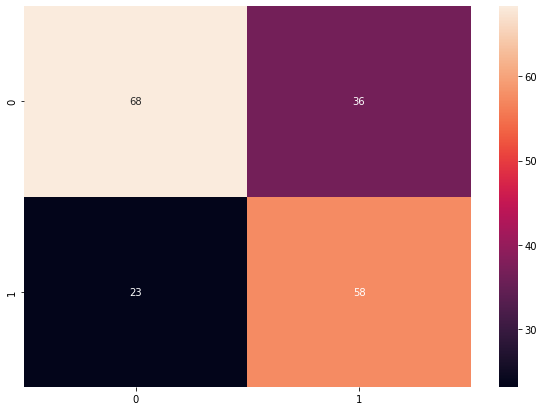

In [124]:
#plot confusion matrix

cm = confusion_matrix(y_test, lgb_pred)
plt.figure(figsize=(10,7))

cm = np.around(cm.astype('float')/1000, decimals=2)
sns.heatmap(cm, annot=True)

In [60]:
# knn model

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.61      0.83      0.70    104766
         1.0       0.59      0.32      0.42     80653

    accuracy                           0.61    185419
   macro avg       0.60      0.57      0.56    185419
weighted avg       0.60      0.61      0.58    185419



<AxesSubplot: >

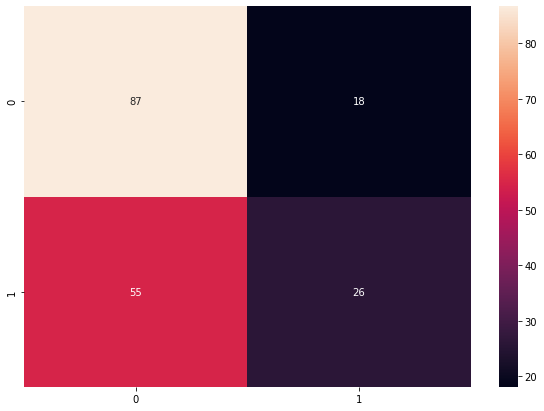

In [102]:
# plot confusion matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(10,7))

cm = np.around(cm.astype('float')/1000, decimals=2)
sns.heatmap(cm, annot=True)


In [63]:
from rgf.sklearn import RGFClassifier, FastRGFClassifier

rgf = RGFClassifier()
rgf.fit(X_train, y_train)

rgf_pred = rgf.predict(X_test)

In [64]:
print(classification_report(y_test,rgf_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.66      0.70    104766
         1.0       0.61      0.70      0.66     80653

    accuracy                           0.68    185419
   macro avg       0.68      0.68      0.68    185419
weighted avg       0.69      0.68      0.68    185419



<AxesSubplot: >

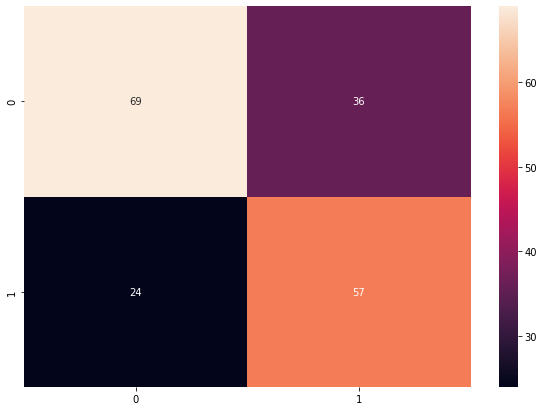

In [101]:
# plot confusion matrix
cm = confusion_matrix(y_test, rgf_pred)
plt.figure(figsize=(10,7))

cm = np.around(cm.astype('float')/1000, decimals=2)
sns.heatmap(cm, annot=True)


In [66]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

gbc_pred = gbc.predict(X_test)

print(classification_report(y_test,gbc_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.66      0.70    104766
         1.0       0.61      0.70      0.65     80653

    accuracy                           0.68    185419
   macro avg       0.68      0.68      0.68    185419
weighted avg       0.69      0.68      0.68    185419



<AxesSubplot: >

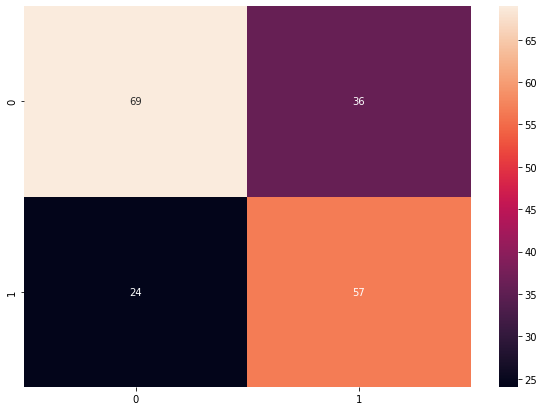

In [100]:
# plot confusion matrix

cm = confusion_matrix(y_test, gbc_pred)
plt.figure(figsize=(10,7))

# format values in confusion matrix to decimals
cm = np.around(cm.astype('float')/1000, decimals=2)
sns.heatmap(cm, annot=True)

In [68]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(X_train, y_train)

abc_pred = abc.predict(X_test)

print(classification_report(y_test,abc_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.63      0.68    104766
         1.0       0.60      0.71      0.65     80653

    accuracy                           0.67    185419
   macro avg       0.67      0.67      0.67    185419
weighted avg       0.68      0.67      0.67    185419



<AxesSubplot: >

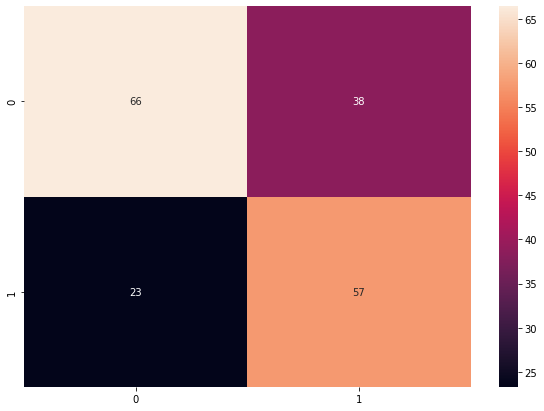

In [99]:
# plot confusion matrix

cm = confusion_matrix(y_test, abc_pred)
plt.figure(figsize=(10,7))

# format values in confusion matrix to decimals
cm = np.around(cm.astype('float')/1000, decimals=2)
sns.heatmap(cm, annot=True)

In [70]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()

sgd.fit(X_train, y_train)

sgd_pred = sgd.predict(X_test)

print(classification_report(y_test,sgd_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.36      0.50    104766
         1.0       0.52      0.92      0.67     80653

    accuracy                           0.60    185419
   macro avg       0.69      0.64      0.59    185419
weighted avg       0.71      0.60      0.58    185419



<AxesSubplot: >

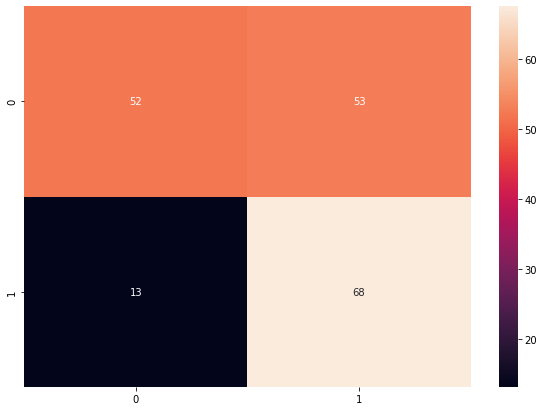

In [98]:
# plot confusion matrix

cm = confusion_matrix(y_test, sgd_pred)
plt.figure(figsize=(10,7))

# format values in confusion matrix to decimals
cm = np.around(cm.astype('float')/1000, decimals=2)
sns.heatmap(cm, annot=True)

In [74]:
sgd = SGDClassifier()

sgd.fit(X_train2, y_train2)

sgd_pred = sgd.predict(X_test2)

print(classification_report(y_test2,sgd_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.50      0.61    104766
         1.0       0.56      0.84      0.67     80653

    accuracy                           0.65    185419
   macro avg       0.68      0.67      0.64    185419
weighted avg       0.70      0.65      0.64    185419



<AxesSubplot: >

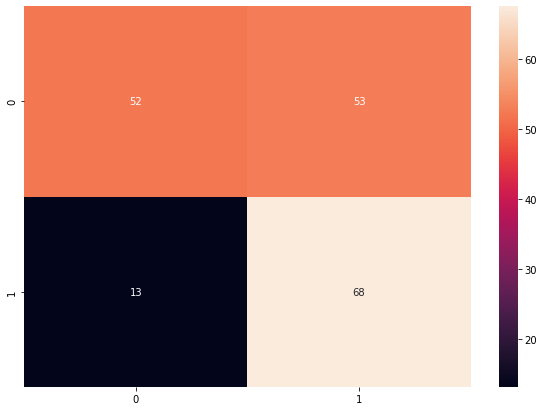

In [104]:
# plot confusion matrix

cm = confusion_matrix(y_test2, sgd_pred)
plt.figure(figsize=(10,7))

cm = np.around(cm.astype('float')/1000, decimals=2)
sns.heatmap(cm, annot=True)

In [76]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train2, y_train2)

xgb_pred = xgb_model.predict(X_test2)
print(classification_report(y_test2,xgb_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.60      0.66    104766
         1.0       0.58      0.72      0.64     80653

    accuracy                           0.65    185419
   macro avg       0.66      0.66      0.65    185419
weighted avg       0.67      0.65      0.65    185419



<AxesSubplot: >

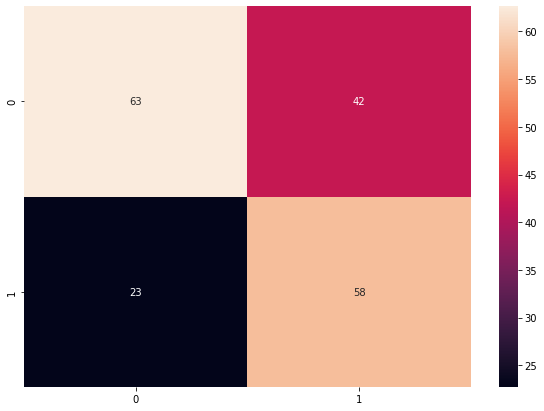

In [105]:
#confusion matrix

cm = confusion_matrix(y_test2, xgb_pred)
plt.figure(figsize=(10,7))

cm = np.around(cm.astype('float')/1000, decimals=2)
sns.heatmap(cm, annot=True)

In [80]:
# lightgbm

lgb_model = lgb.LGBMClassifier()

lgb_model.fit(X_train, y_train)

lgb_pred = lgb_model.predict(X_test)
print(classification_report(y_test,lgb_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.65      0.70    104766
         1.0       0.61      0.71      0.66     80653

    accuracy                           0.68    185419
   macro avg       0.68      0.68      0.68    185419
weighted avg       0.69      0.68      0.68    185419



<AxesSubplot: >

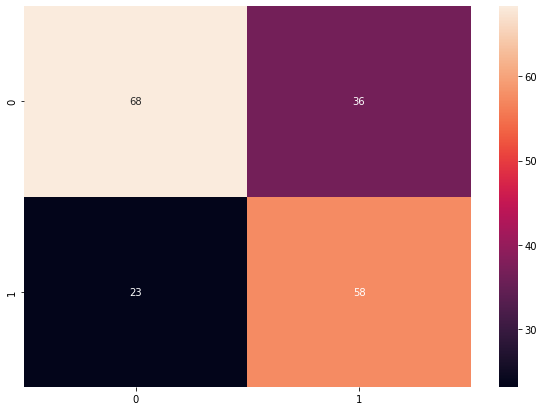

In [106]:
#confusion matrix

cm = confusion_matrix(y_test, lgb_pred)
plt.figure(figsize=(10,7))

cm = np.around(cm.astype('float')/1000, decimals=2)
sns.heatmap(cm, annot=True)

In [82]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()

perceptron.fit(X_train, y_train)

perceptron_pred = perceptron.predict(X_test)

print(classification_report(y_test,perceptron_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.19      0.31    104766
         1.0       0.48      0.97      0.64     80653

    accuracy                           0.53    185419
   macro avg       0.69      0.58      0.48    185419
weighted avg       0.72      0.53      0.45    185419



<AxesSubplot: >

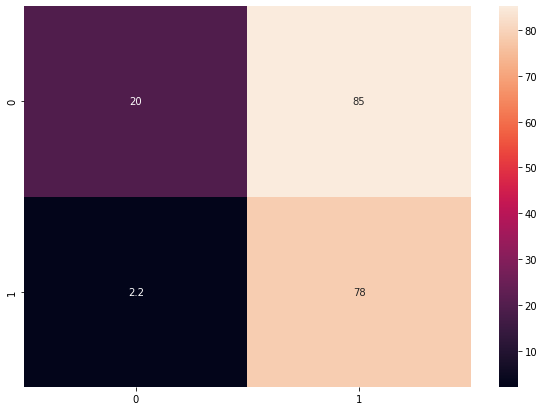

In [107]:
#confusion matrix

cm = confusion_matrix(y_test, perceptron_pred)
plt.figure(figsize=(10,7))
cm = np.around(cm.astype('float')/1000, decimals=2)
sns.heatmap(cm, annot=True)

In [87]:
#n voting classifier

from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('xgb', xgb_model), ('lgb', lgb_model), ('perceptron', perceptron)], voting='hard')
voting_clf.fit(X_train, y_train)

voting_pred = voting_clf.predict(X_test)

print(classification_report(y_test,voting_pred))


              precision    recall  f1-score   support

         0.0       0.75      0.64      0.69    104766
         1.0       0.61      0.72      0.66     80653

    accuracy                           0.68    185419
   macro avg       0.68      0.68      0.68    185419
weighted avg       0.69      0.68      0.68    185419



<AxesSubplot: >

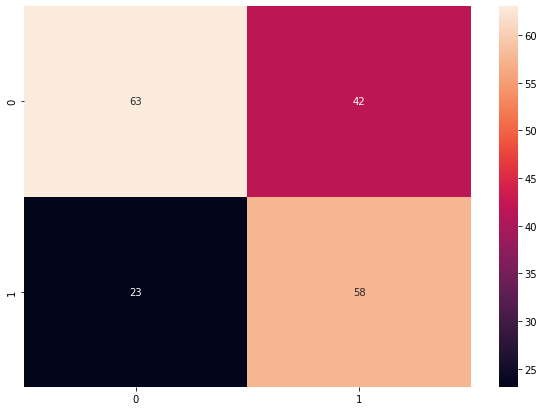

In [108]:
# confusion matrix

cm = confusion_matrix(y_test, voting_pred)
plt.figure(figsize=(10,7))

cm = np.around(cm.astype('float')/1000, decimals=2)
sns.heatmap(cm, annot=True)

In [90]:
voting_clf = VotingClassifier(estimators=[('xgb', xgb_model), ('lgb', lgb_model), ('perceptron', perceptron),('knn',knn),('abc',abc),('sgd',sgd)], voting='hard')
voting_clf.fit(X_train, y_train)

voting_pred = voting_clf.predict(X_test)

print(classification_report(y_test,voting_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.66      0.70    104766
         1.0       0.61      0.71      0.66     80653

    accuracy                           0.68    185419
   macro avg       0.68      0.68      0.68    185419
weighted avg       0.69      0.68      0.68    185419



<AxesSubplot: >

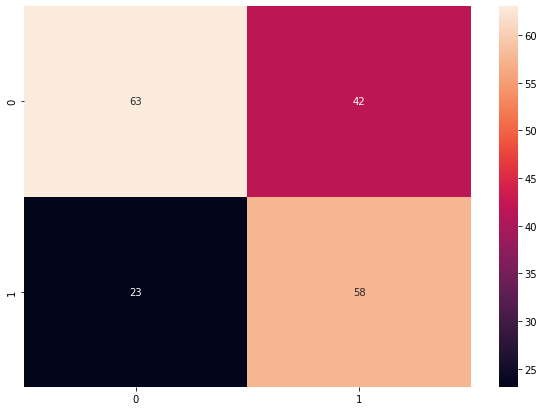

In [109]:
# confusion matrix

cm = confusion_matrix(y_test, voting_pred)
plt.figure(figsize=(10,7))

cm = np.around(cm.astype('float')/1000, decimals=2)
sns.heatmap(cm, annot=True)

In [92]:
voting_clf = VotingClassifier(estimators=[('xgb', xgb_model), ('lgb', lgb_model), ('perceptron', perceptron),('knn',knn),('abc',abc),('sgd',sgd)], voting='hard')
voting_clf.fit(X_train2, y_train2)

voting_pred = voting_clf.predict(X_test2)

print(classification_report(y_test,voting_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.60      0.66    104766
         1.0       0.58      0.71      0.64     80653

    accuracy                           0.65    185419
   macro avg       0.66      0.66      0.65    185419
weighted avg       0.67      0.65      0.65    185419



<AxesSubplot: >

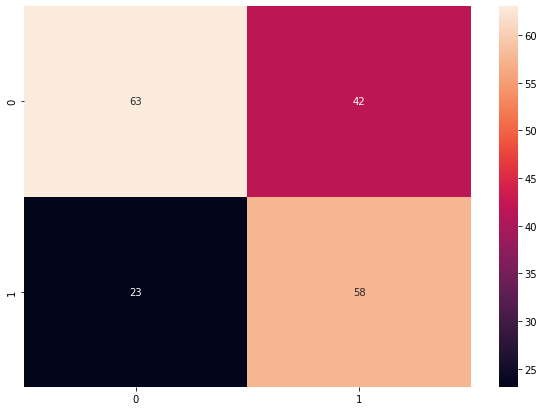

In [110]:
# confusion matrix

cm = confusion_matrix(y_test, voting_pred)
plt.figure(figsize=(10,7))

cm = np.around(cm.astype('float')/1000, decimals=2)
sns.heatmap(cm, annot=True)

In [84]:
# Neural Network

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

mlp.fit(X_train, y_train)

mlp_pred = mlp.predict(X_test)

print(classification_report(y_test,mlp_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.65      0.69    104766
         1.0       0.61      0.71      0.66     80653

    accuracy                           0.67    185419
   macro avg       0.68      0.68      0.67    185419
weighted avg       0.68      0.67      0.68    185419



<AxesSubplot: >

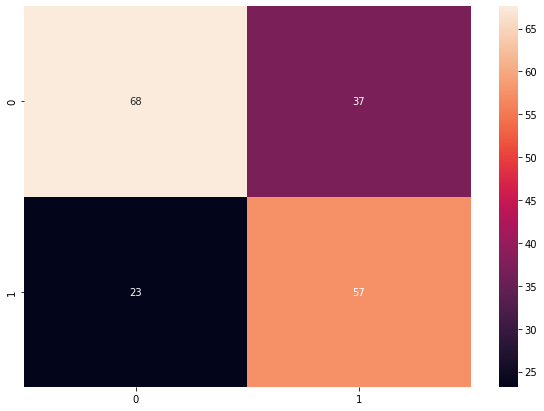

In [111]:
#confusion matrix

cm = confusion_matrix(y_test, mlp_pred)

plt.figure(figsize=(10,7))

cm = np.around(cm.astype('float')/1000, decimals=2)
sns.heatmap(cm, annot=True)

In [86]:
# tensorflow neural network

import tensorflow as tf


KeyboardInterrupt: 

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')

plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)

plt.ylim(lims)

_ = plt.plot(lims, lims)

error = test_predictions - y_test

plt.hist(error, bins = 25)
